# Import Necessary Modules

In [9]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import math


# Importing Dataset and separating Features and Targets

In [10]:

dataset = pd.read_csv('diabetes.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


# Splitting Data into train and Test

In [11]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23)


# Fitting KNN for different Size of Nearest Neighbors

In [12]:
error = []
bestNeighbor = 0
bestError = 1
upper_bound = int(math.sqrt(len(X)))
for i in range(1, upper_bound):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    total_error = np.mean(pred_i != y_test)
    error.append(total_error)
    if bestError > total_error:
        bestError = total_error
        bestNeighbor = i


In [13]:
print( f'THe best Accuracy we get is {1-bestError:.3f} for {bestNeighbor}-Nearest Neighbor')


THe best Accuracy we get is 0.805 for 6-Nearest Neighbor


# Using best K to see confusion matrix

In [14]:
knn = KNeighborsClassifier(n_neighbors=bestNeighbor)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[93,  8],
       [22, 31]], dtype=int64)

# Plotting Graph

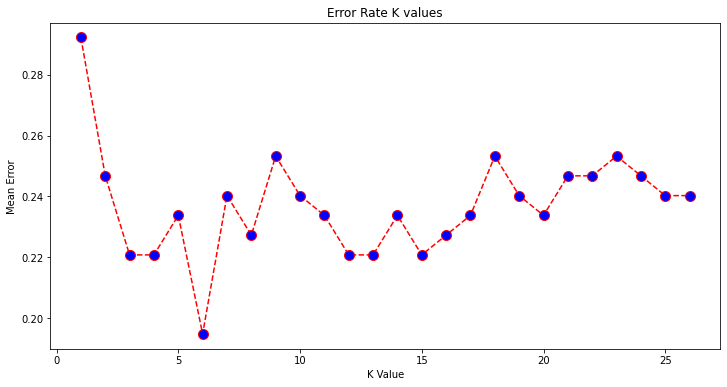

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, upper_bound), error, color='red', linestyle='dashed',
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K values')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
